# Perceptron

***

[Veja esse exemplo didático](https://www.w3schools.com/ai/ai_perceptrons.asp)

## Importando bibliotecas

In [29]:
# Bibliotecas de manipualção e visualização de dados
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

# Classes dos modelo
from sklearn.linear_model import Perceptron

# Funções de avaliação dos modelos
from sklearn.metrics import (confusion_matrix, 
                             ConfusionMatrixDisplay,
                             classification_report)

from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

## Análise do conjunto de dados

In [30]:
#Carregando o dataset
dataset = pd.read_csv('https://raw.githubusercontent.com/johnattandouglas/monitoria-ml/main/Datasets/Iris.csv')

# Mapeando os valores da classe para inteiro (para fins de visualização da região de decisão)
dataset['Species'] = pd.factorize(dataset['Species'])[0]

### Separando o conjunto de dados

In [31]:
#Vamos usar somente duas features PetalLengthCm e PetalWidthCm
X = dataset.iloc[:,[2,3]]
y = dataset.iloc[:,[4]]

# para treinar e avaliar um classificador, precisamos dividir o dataset em dois conjuntos, ...
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

## Treinamento do modelo 

In [32]:
# ... referenciando o modelo
model = Perceptron()

#treinando o modelo
model.fit(X_train, y_train)

#predição
y_pred = model.predict(X_test)

In [33]:
# qual o resultado para esse classificador?
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.15      0.27        13
           1       0.33      1.00      0.50        12
           2       0.00      0.00      0.00        13

    accuracy                           0.37        38
   macro avg       0.44      0.38      0.26        38
weighted avg       0.45      0.37      0.25        38



[[0.15384615 0.84615385 0.        ]
 [0.         1.         0.        ]
 [0.         1.         0.        ]]

 Labels:[0 1 2] 



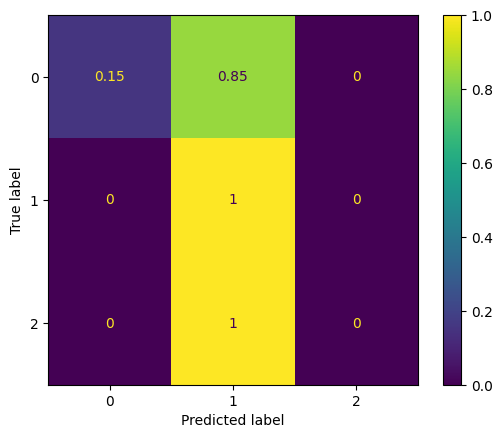

In [34]:
# a função confusion matrix retorna uma matriz com a contagem de como cada 
# uma das classes está sendo classificada corretamente ou erroneamente
cm = confusion_matrix(y_test, y_pred, labels=model.classes_, normalize="true")
print(cm)

print(f"\n Labels:{model.classes_} \n")

#display_labels - define como será a ordem das classes na matriz
disp_cm = ConfusionMatrixDisplay(cm, display_labels=model.classes_)
disp_cm.plot()


In [35]:
def show_decision_region(X, y, model):
    feature_0 = X.columns[0]
    feature_1 = X.columns[1]

    plot_decision_regions(np.array([X[feature_0].values,
                                    X[feature_1].values]).T,
                                    y.values.flatten(), model)
    plt.xlabel(feature_0)
    plt.ylabel(feature_1)

    plt.title(model.__class__.__name__)
    plt.show()

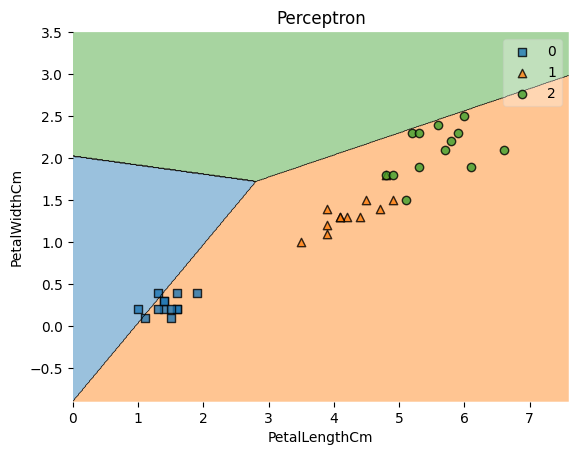

In [36]:
show_decision_region(X_test, y_test, model)

In [37]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

param_grid = {
    'penalty': ['l2', 'l1', 'elasticnet'],
    'alpha': [0.0001, 0.001, 0.01, 0.1, 1], #Constant that multiplies the regularization term if regularization is used
    'max_iter': [1000, 2000, 3000],
    'shuffle': [True, False]
}

model = Perceptron()

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
print(f'Melhores hiperparâmetros: {grid_search.best_params_}')

y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia do modelo: {accuracy}')


Melhores hiperparâmetros: {'alpha': 0.01, 'max_iter': 1000, 'penalty': 'elasticnet', 'shuffle': False}
Acurácia do modelo: 0.6842105263157895


[[1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]]

 Labels:[0 1 2] 



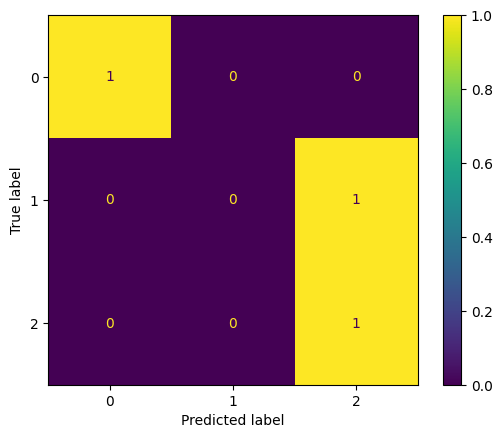

In [38]:
cm = confusion_matrix(y_test, y_pred, labels=best_model.classes_, normalize="true")
print(cm)
print(f"\n Labels:{best_model.classes_} \n")

disp_cm = ConfusionMatrixDisplay(cm, display_labels=best_model.classes_)
disp_cm.plot()
plt.show()


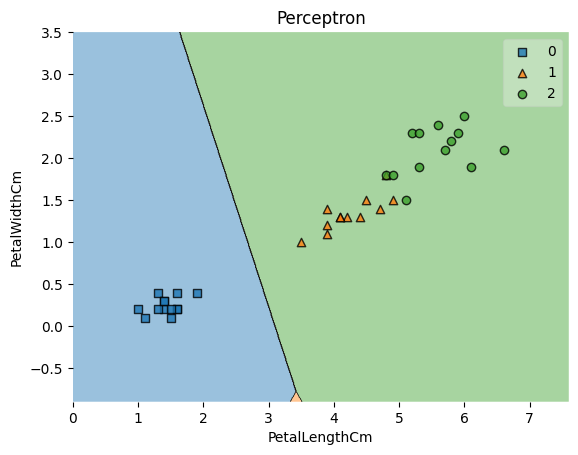

In [39]:
show_decision_region(X_test, y_test, best_model)